# In this model we are going to predict the Crops Damaged from the given dataset

# Importing the required Libraries

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import rcParams

%matplotlib inline

import re


In [14]:
import warnings
warnings.simplefilter("ignore")

# Loading the Dataset

In [15]:
import pandas as pd
a = pd.read_csv("Agriculture.csv")
a.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


# Exploratory Data Analysis

In [16]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [17]:
a['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [18]:
a.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [19]:
# filling the missing values

a['Number_Weeks_Used'].fillna(a['Number_Weeks_Used'].mode()[0], inplace=True)
a.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [20]:
a['Number_Doses_Week'].value_counts()

20    22589
40    12298
10    12111
30    10438
15     8178
5      5520
25     4890
60     4367
50     3361
35     1832
45      936
0       837
80      672
70      303
55      277
90       83
65       64
75       61
95       30
85       11
Name: Number_Doses_Week, dtype: int64

In [21]:
a.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,27.750490,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.032261,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


Chances of crop damange based on crop type: 
Crop_Type
0    0.195285
1    0.178677
Name: Crop_Damage, dtype: float64


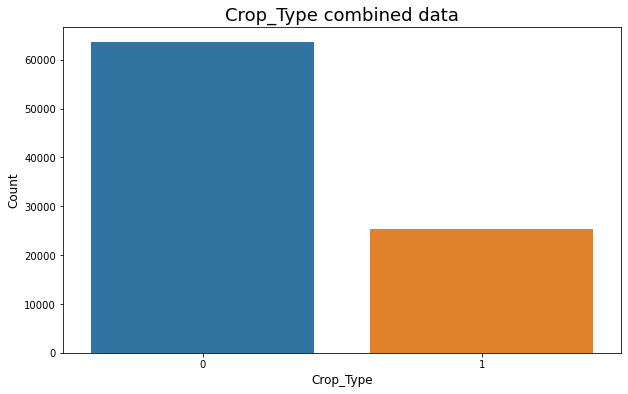

In [25]:
print("Chances of crop damange based on crop type: ") 
print(a.groupby("Crop_Type")["Crop_Damage"].mean())


plt.figure(figsize=(10,6))


sns.countplot(x='Crop_Type', data=a)
plt.xlabel("Crop_Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Crop_Type combined data", fontsize=18)

plt.show()

In [26]:
a_train1=a.drop('ID', axis=1)

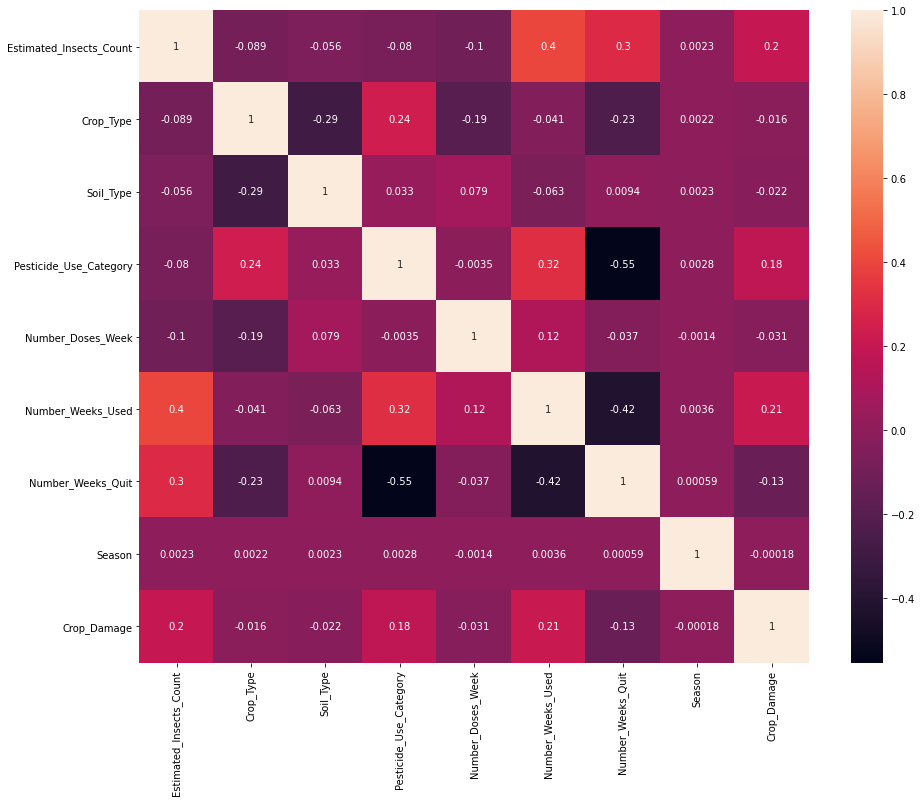

In [27]:
plt.show()
plt.figure(figsize=(15,12))
sns.heatmap(a_train1.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

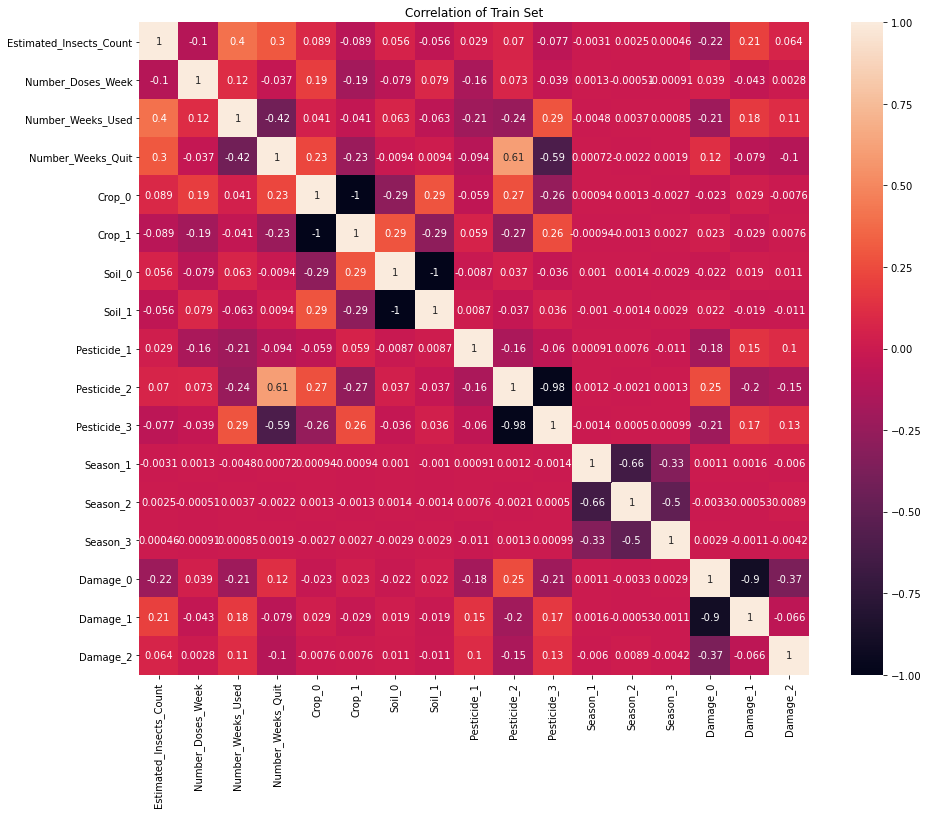

In [28]:
a_train = pd.get_dummies(a_train1, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season","Crop_Damage"],\
                         prefix=["Crop","Soil","Pesticide","Season","Damage"], drop_first=False)
plt.figure(figsize=(15,12))
plt.title('Correlation of Train Set')
sns.heatmap(a_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [29]:
a_train

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3,Damage_0,Damage_1,Damage_2
0,188,0,0.0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
1,209,0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,257,0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
3,257,0,0.0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
4,342,0,0.0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,3337,10,12.0,44,0,1,1,0,0,1,0,0,0,1,1,0,0
88854,3516,10,20.0,38,0,1,1,0,0,1,0,1,0,0,1,0,0
88855,3516,15,40.0,8,0,1,1,0,0,1,0,0,1,0,1,0,0
88856,3702,10,25.0,18,0,1,1,0,0,1,0,0,0,1,1,0,0


In [31]:
a_train['Estimated_Insects_Count'] = a_train['Estimated_Insects_Count'].astype("int16")
a_train['Number_Doses_Week'] = a_train['Number_Doses_Week'].astype("int16")
a_train['Number_Weeks_Used'] = a_train['Number_Weeks_Used'].astype("int16")
a_train['Number_Weeks_Quit'] = a_train['Number_Weeks_Quit'].astype("int16")

In [33]:
a_train.info()
a_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Estimated_Insects_Count  88858 non-null  int16
 1   Number_Doses_Week        88858 non-null  int16
 2   Number_Weeks_Used        88858 non-null  int16
 3   Number_Weeks_Quit        88858 non-null  int16
 4   Crop_0                   88858 non-null  uint8
 5   Crop_1                   88858 non-null  uint8
 6   Soil_0                   88858 non-null  uint8
 7   Soil_1                   88858 non-null  uint8
 8   Pesticide_1              88858 non-null  uint8
 9   Pesticide_2              88858 non-null  uint8
 10  Pesticide_3              88858 non-null  uint8
 11  Season_1                 88858 non-null  uint8
 12  Season_2                 88858 non-null  uint8
 13  Season_3                 88858 non-null  uint8
 14  Damage_0                 88858 non-null  uint8
 15  Da

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3,Damage_0,Damage_1,Damage_2
0,188,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
1,209,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,257,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
3,257,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0
4,342,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0


# Building Machine Learning Model

In [34]:
train=pd.read_csv('Agriculture.csv')

In [36]:
train['Estimated_Insects_Count']=np.log(train['Estimated_Insects_Count'])

In [37]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1.946611,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,0.099830,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,1.611563,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.886223,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1.960099,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,2.021356,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,2.118423,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [38]:
train['Number_Doses_Week_bin'] = np.where(train['Number_Doses_Week']>20,1,0)
train['Number_Weeks_Used_bin'] = np.where(train['Number_Weeks_Used']>36,1,0)
train['Number_Weeks_Quit_bin'] = np.where(train['Number_Weeks_Quit']>7,1,0)

In [39]:
# Label Ecoding for Categorical Values


train = pd.get_dummies(train, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],\
                         prefix=["Crop","Soil","Pesticide","Season"], drop_first=False)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  float64
 2   Number_Doses_Week        88858 non-null  int64  
 3   Number_Weeks_Used        79858 non-null  float64
 4   Number_Weeks_Quit        88858 non-null  int64  
 5   Crop_Damage              88858 non-null  int64  
 6   Number_Doses_Week_bin    88858 non-null  int32  
 7   Number_Weeks_Used_bin    88858 non-null  int32  
 8   Number_Weeks_Quit_bin    88858 non-null  int32  
 9   Crop_0                   88858 non-null  uint8  
 10  Crop_1                   88858 non-null  uint8  
 11  Soil_0                   88858 non-null  uint8  
 12  Soil_1                   88858 non-null  uint8  
 13  Pesticide_1              88858 non-null  uint8  
 14  Pesticide_2           

In [41]:
column=['Crop_0','Crop_1','Soil_0','Soil_1','Pesticide_1','Pesticide_2','Pesticide_3','Season_1','Season_2','Season_3']
for i in column:
    train[i] = train[i].astype('category')
    train[i] = train[i].cat.codes.astype("int16")

In [42]:
train=train.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1)
train=train.drop(['ID'],axis=1)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

In [44]:
X= train.drop(['Crop_Damage'],axis=1)
y= train['Crop_Damage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

In [51]:
pip install lightgbm --install-option=--nomp

  Using cached lightgbm-3.1.1.tar.gz (588 kB)
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm: started
    Running setup.py install for lightgbm: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\commands\install.py:243: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Kansnaga\\AppData\\Local\\Temp\\pip-install-f02amccd\\lightgbm\\setup.py'"'"'; __file__='"'"'C:\\Users\\Kansnaga\\AppData\\Local\\Temp\\pip-install-f02amccd\\lightgbm\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\Kansnaga\AppData\Local\Temp\pip-record-isnc5wr2\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\ProgramData\Anaconda3\Include\lightgbm' --nomp
         cwd: C:\Users\Kansnag

In [7]:
kfold = KFold(n_splits=10, random_state=7)
resultsCAT = cross_val_score(cb,X_train, y_train,cv=kfold)
print("CAT",resultsCAT.mean()*100)

NameError: name 'a' is not defined